In [1]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Parámetros del medio y la partícula
c = 3e8  # Velocidad de la luz en el vacío (m/s)
n = 1.33  # Índice de refracción del medio
beta = 1.1  # Velocidad de la partícula como fracción de c
v_particle = beta * c  # Velocidad de la partícula

In [3]:
# Dominio de simulación
grid_size = 100
x = np.linspace(-10, 10, grid_size)
y = np.linspace(-10, 10, grid_size)
z = np.linspace(-10, 10, grid_size)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

In [4]:
# --- 1. Generación del Cono de Radiación ---
def generate_radiation_cone(beta, n):
    """
    Genera un campo eléctrico que representa el cono de radiación Cherenkov.
    """
    theta_C = np.arccos(1 / (n * beta))
    cone = np.exp(-((X**2 + Y**2) / np.tan(theta_C)**2 + Z**2))
    return cone

field_data = generate_radiation_cone(beta, n)

In [7]:
def visualize_3D_plotly(field_data, title="Cherenkov Radiation - 3D Visualization"):
    """
    Visualiza el campo eléctrico en 3D usando Plotly.
    """
    x, y, z = np.mgrid[-10:10:complex(grid_size), -10:10:complex(grid_size), -10:10:complex(grid_size)]
    fig = go.Figure(data=go.Volume(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=field_data.flatten(),
        isomin=0.1,
        isomax=1.0,
        opacity=0.1,  # Transparencia
        surface_count=20,  # Número de superficies
        colorscale='Viridis'
    ))
    fig.update_layout(scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis'
    ), title=title)

    # Guarda el gráfico como un archivo HTML
    fig.write_html("cherenkov_radiation.html")
    print("El gráfico se ha guardado como 'cherenkov_radiation.html'. Ábrelo en un navegador para verlo.")

visualize_3D_plotly(field_data)


El gráfico se ha guardado como 'cherenkov_radiation.html'. Ábrelo en un navegador para verlo.


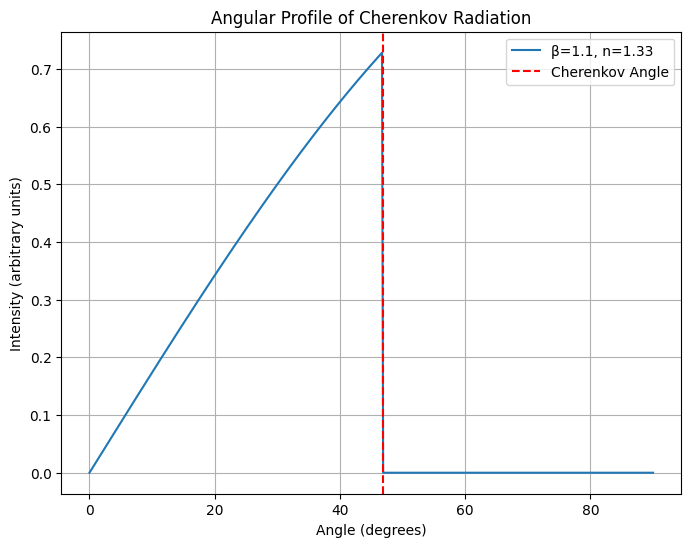

In [8]:
# --- 2. Perfil Angular del Cono de Radiación ---
def angular_profile(beta, n):
    """
    Calcula y grafica el perfil angular del cono de radiación.
    """
    theta_C = np.arccos(1 / (n * beta))
    angles = np.linspace(0, np.pi / 2, 500)
    intensities = np.sin(angles) * (angles < theta_C)
    
    plt.figure(figsize=(8, 6))
    plt.plot(np.degrees(angles), intensities, label=f"β={beta}, n={n}")
    plt.axvline(np.degrees(theta_C), color="r", linestyle="--", label="Cherenkov Angle")
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Intensity (arbitrary units)")
    plt.title("Angular Profile of Cherenkov Radiation")
    plt.legend()
    plt.grid()
    plt.show()

angular_profile(beta, n)


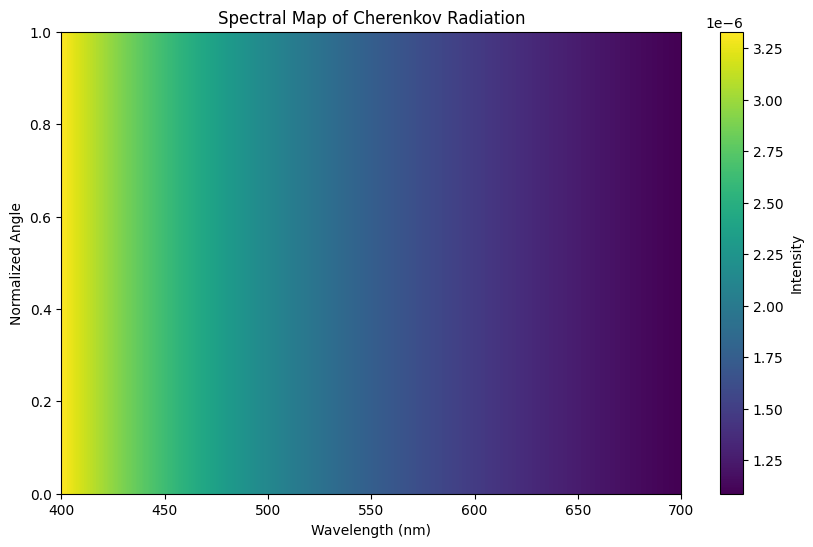

In [10]:
# --- 3. Mapa Espectral de Radiación ---
def spectral_map(beta, n, wavelengths):
    """
    Genera un mapa espectral de la radiación Cherenkov.
    """
    theta_C = np.arccos(1 / (n * beta))
    spectrum = []
    for wavelength in wavelengths:
        intensities = (1 - (1 / (n * beta))**2) / wavelength**2
        spectrum.append(intensities)
    
    spectrum = np.array(spectrum)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(
        [spectrum],
        extent=(wavelengths.min(), wavelengths.max(), 0, 1),
        aspect="auto",
        origin="lower",
        cmap="viridis",
    )
    plt.colorbar(label="Intensity")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Normalized Angle")
    plt.title("Spectral Map of Cherenkov Radiation")
    plt.show()

wavelengths = np.linspace(400, 700, 300)  # Longitudes de onda (en nm)
spectral_map(beta, n, wavelengths)